# COGS 108 Final Project

In [6]:
import sys
!conda install --yes --prefix {sys.prefix} beautifulsoup4

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.9
  latest version: 4.4.11

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [8]:
import requests
import bs4
from bs4 import BeautifulSoup

## Financial Data
We looked into a few different options for pulling the financial data that we need. One of the options was pulling from API's like a Yahoo Finance API. However we also realized that Yahoo Finance had a download option where we could export the data we wanted in a timeframe to a CSV. We decided to use the data in this format since it is how we have been working with data in this class on the assignments. 

In [6]:
#Read in csv data

df_amzn = pd.read_csv('AMZN_recent.csv')

#Drop unimportant rows
df_amzn = df_amzn.drop(['Adj Close','Volume'],1)

#Add new column named Daily Avg that averages the high and low of that day. 
df_amzn['Daily Avg'] = df_amzn[['High','Low']].mean(axis=1)
df_amzn['Daily Change']= df_amzn['Close'].diff()

#Change Date column to date that can be read by matplotlib and pandas
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])

In [19]:
#Read in csv data

df_nike = pd.read_csv('NKE_6month.csv')

#Drop unimportant rows
df_nike = df_nike.drop(['Adj Close','Volume'],1)

#Add new column named Daily Avg that averages the high and low of that day. 
df_nike['Daily Avg'] = df_nike[['High','Low']].mean(axis=1)
df_nike['Daily Change']= df_nike['Close'].diff()

#Change Date column to date that can be read by matplotlib and pandas
df_nike['Date'] = pd.to_datetime(df_nike['Date'])

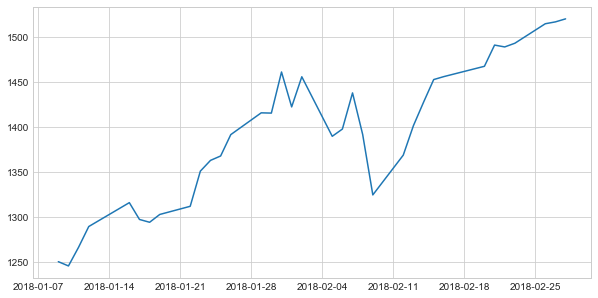

In [21]:
#Plot Daily Avg over time

plt.plot(df_amzn['Date'],df_amzn['Daily Avg'])

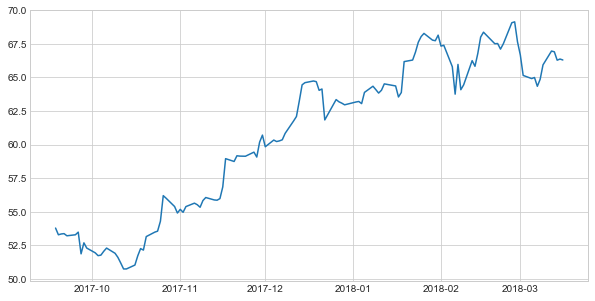

In [22]:
plt.plot(df_nike['Date'],df_nike['Daily Avg'])

Web Scraping Test

In [24]:
# function to extract new headlines and dates.
# Takes starting URL and a limit of how many entries we want our table to be
# It iterates over it until i has a a list of 1000 entries
# Number of entries can be modified by changing the variable 'limit'
# Returns a json file with titles and dates

def get_headlines(site, user_limit):
    # Creates empty to list where titles will be added
    df = pd.DataFrame(columns=['Date','Headline'])
    page = requests.get(site)
    soup = BeautifulSoup(page.content, 'html.parser')
    newsRead = 0
    
    while newsRead < user_limit:
        #repeat = False;
        news = soup.find_all("div", {"class": "title"})
        for newsItem in news[1:]:
            df.loc[newsRead] = [newsItem.div.string,newsItem.span.string]
            newsRead += 1

        nextPage = soup.find("div", {"class": "numberedpagenav"}).find("a", {"class": "active"}).find_next_sibling()
        if(nextPage['class'] == "disabled"):
            break
        else:        # Changes the page to parse to the next page
            page = requests.get(nextPage['href']) 
            soup = BeautifulSoup(page.content, 'html.parser')

    return df
#    return json.dumps(my_list)

In [27]:
# Calling the function to extract data from website nand printing the panda representation
# Takes about 30 sec to 1 minute because it is iterating through all the pages until it the list goes over
# the limit, which in this case I set it to a 1000
#https://markets.financialcontent.com/stocks/quote/news?Limit=500&Symbol=321%3A957150
site = 'https://markets.financialcontent.com/stocks/quote/news?Limit=500&Symbol=537%3A645156'
#df_amazon = pd.read_json(get_headlines(site, 10))
df_amazon =get_headlines(site, 2000)

In [47]:
df_amazon.to_json("Amazon_news.json")

In [25]:
# Calling the function to extract data from website nand printing the panda representation
# Takes about 30 sec to 1 minute because it is iterating through all the pages until it the list goes over
# the limit, which in this case I set it to a 1000
site = 'https://markets.financialcontent.com/stocks/quote/news?Limit=500&Symbol=321%3A957150'
df_nike_head =get_headlines(site, 2000)
df_nike_head

,Date,Headline
0,Today 18:40 EDT,Looking Towards A Dovish Fed Meeting
1,Today 16:41 EDT,3 Things to Watch in the Stock Market This Week
2,Today 12:00 EDT,Nike Earnings: 3 Trends to Watch
3,"March 16, 2018",Q1 Earnings Season To Show Growth Acceleration
4,"March 16, 2018",Nike executives' departures reflect a larger c...
5,"March 16, 2018",Q1 Earnings Season to Show Growth Acceleration
6,"March 16, 2018",Second Nike executive leaves company amid comp...
7,"March 16, 2018",Top 100 Reputable Companies Around the Globe A...
8,"March 16, 2018",BRIEF-Nike Vice President Jayme Martin Exits C...
9,"March 16, 2018",Glassdoor reviews of Nike's headquarters alleg...


In [26]:
df_nike_head.to_json('Nike_news.json')

In [51]:
#Only look at articles with Nike in title
df_nike_clean = df_nike_head[df_nike_head['Headline'].str.contains("Nike")]

In [52]:
df_nike_clean.to_json('Nike_news_clean.json')

In [1]:
def get_headlines2(site, user_limit):
    title_list = []
    while len(title_list) < user_limit:
        page = requests.get(site)
        soup = BeautifulSoup(page.content, 'html.parser')
        spans = soup.find_all('span', {'class': 'fontS14px'})
        title_count = 0
        for span in spans:
            if title_count < 10:
                title = span.find('a').text
                title_list.append(title)
                title_count += 1
        page_link_list = soup.find_all('a', {'class' : 'pagerlink'}, text='next >')
        if(page_link_list):
            for page_link in page_link_list:
                site = page_link['href']
        else:
            break
    return title_list

In [ ]:
site = 'https://www.nasdaq.com/symbol/nke/news-headlines'
get_headlines2(site, 1000)

Analysis

In [9]:
amazonfreq_df = pd.read_json('Frequency+Date(Feb28-Jan09).json')

In [10]:
amazonfreq_df = amazonfreq_df.sort_values('Date')
amazonfreq_df['Freq Adj'] = amazonfreq_df['Frequency'].div(amazonfreq_df['Number of News'])
amazonfreq_df

,Date,Frequency,Number of News,Freq Adj
50,2018-01-09,1,8,0.125000
49,2018-01-10,4,34,0.117647
48,2018-01-11,2,26,0.076923
47,2018-01-12,15,60,0.250000
46,2018-01-13,0,9,0.000000
45,2018-01-14,1,9,0.111111
44,2018-01-15,4,21,0.190476
43,2018-01-16,3,48,0.062500
42,2018-01-17,9,49,0.183673
41,2018-01-18,8,48,0.166667


Text(0.5,1,'Amazon Price Change (Daily)')

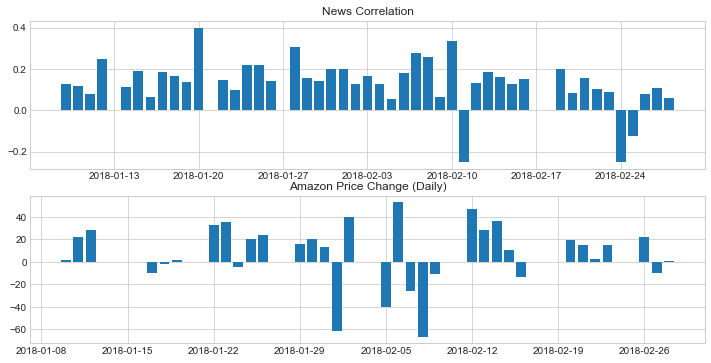

In [11]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

fig,ax = subplots(2,1)
fig.tight_layout()
axs = ax[0]
axs.bar(amazonfreq_df['Date'],amazonfreq_df['Freq Adj'])
axs.set_title('News Correlation')

axs = ax[1]
axs.bar(df_amzn['Date'],df_amzn['Daily Change'])
axs.set_title('Amazon Price Change (Daily)')

In [12]:
new_df = amazonfreq_df.merge(df_amzn,how='outer')
new_df = new_df.fillna(0)
new_df

,Date,Frequency,Number of News,Freq Adj,Open,High,Low,Close,Daily Avg,Daily Change
0,2018-01-09,1,8,0.125000,1256.900024,1259.329956,1241.760010,1252.699951,1250.544983,0.000000
1,2018-01-10,4,34,0.117647,1245.150024,1254.329956,1237.229980,1254.329956,1245.779968,1.630005
2,2018-01-11,2,26,0.076923,1259.739990,1276.770020,1256.459961,1276.680054,1266.614990,22.350098
3,2018-01-12,15,60,0.250000,1273.390015,1305.760010,1273.390015,1305.199951,1289.575012,28.519897
4,2018-01-13,0,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2018-01-14,1,9,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2018-01-15,4,21,0.190476,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2018-01-16,3,48,0.062500,1323.000000,1339.939941,1292.300049,1304.859985,1316.119995,-0.339966
8,2018-01-17,9,49,0.183673,1312.239990,1314.000000,1280.880005,1295.000000,1297.440002,-9.859985
9,2018-01-18,8,48,0.166667,1293.949951,1304.599976,1284.020020,1293.319946,1294.309998,-1.680054


In [13]:
from scipy.stats import pearsonr

stat, pval = pearsonr(new_df['Freq Adj'],new_df['Daily Change'])

print("same day: correlated:", stat) # positively correlated
if (pval > 0.05):
    print("not significant")
else:
    print("significant")

same day: correlated: -0.0292774265695
not significant
